# Machine Learning

In this series of posts we will take a look at some of the most basic Machine Learning algorithms. This is not a math-heavy series; we will focus on the concepts instead. An excellent book for those who want a bit more depth is the widely popular *An Introduction to Statistical Learning, with Application in R* by James, Witten, Hastie and Tibshirani, from the *Springer Texts in Statistics* series. I will try to be as short as possible so I will inevitably omit some details. This series of articles also assumes some basic familiarity with programming.

## Part 1: Linear Regression

We will of course start with linear regression, the most common algorithm which serves as basis (even if only conceptually) for many other more advanced algorithms. But before that let us get into a bit of theory about Machine Learning in general.

#### Pattern recognition

Our goal is to detect a pattern, or in other words to infer a relationship. This relationship is a way to get from point A to point B. Let's think of an example:

* 2 apples cost \$2
* 3 apples cost \$3
* 4 apples cost \$4

By now you have probably guessed that by performing a single division we can get the price of 1 apple, which is \$1\. That is pattern recognition.

#### Basic Linear Regression

So, how many dollars do you have to pay for 7 apples? 10 apples? X apples? Simply, \$1 \* X apples = \$X\. Now let's say that the amount of dollars you have to pay takes the name Y. Now the relationship takes the form **Y = 1*X**. That is linear regression. Let's take a step further.

#### Beers in a bar

Let's say you want to go into a bar to drink a few (non-alcohol) beers, but this bar is insanely popular and it charges an entrance fee of \$8. You're willing to pay that fee because the music is awesome and your friends are already inside. You go to the bar, order a beer, and you pay \$3. Time goes on, and you order another beer, again \$3 (it would be weird otherwise, no?). Modelling time! First, we name our variables:

* Entrance fee of \$8, will be **b**
* Beer price of \$3,  **a**
* Number of beers drank, **X**
* Amount of dollars paid, **Y**

We can see that no matter how many beers we drink, the we will always pay the flat entrance fee of \$8. Then, the rest of the tab depends on our consumption, and since the beer price does not change, we can use our basic linear regression from above, with the multiplier being **a** instead of 1, plus the entrance fee, so Y = 3*X + 8, or in the more general form: 


    Y = a*X + b

That's Linear Regression.

### More complex data

Beer price in the bar might be the same over the course of the night, but what if the beer tax changes in a week? Or the beer makers had a tough season and need to raise the prices? And in the next month the logistics company finds a new and faster route and the price drops again. Now the beer price will not always be the same, it will be \$3.00 one week and \$3.04 another, perhaps \$4.00 in a year or \$2.60 in another bar. That second bar might charge \$9.00 for its entrance fee, and a third might not charge entrance. How do we model relationships such as these?

We allow for some error, **e**, and our other parameters, **a** and **b** become estimates that are as close to the true as we possibly can, and our relationship becomes: **Y = a*X + b + e**

### Performing Linear Regression

There are a lot of ways to perform the estimation of parameters we mentioned above the most common being *Ordinary Least Squares* and *Maximum Likelihood Estimation*. We will not go into the specifics here as they require some understanding of math and statistics, but we will show some code, so a very basic familiarity with (Python) programming is required. Model performance and other concepts will be explained as they arise.

#### First we import our libraries

In [1]:
from sklearn.linear_model import LinearRegression # This will evaluate the relationship
from sklearn.metrics import r2_score # We need a metric to see how well our model is doing
import numpy as np # Import numpy (stands for NUMerical PYthon) to use array, get random values, etc
import matplotlib.pyplot as plt # this library is used for plotting

# to view our plots in this page, not in a pop-up, use this
%matplotlib inline

#### Getting some data

sklearn provides some datasets that we can use for our example. Here's how to load them. The result is a dictionary, out of which we are interested in 'data' (our X) and 'target' (our Y). feature_names provides the text labels of our X columns, something we can understand. DESCR provides a description of the dataset. Access any element by key, like this: boston_data\["data"\]

In [2]:
from sklearn.datasets import load_boston

# loads the data
boston_data = load_boston()

# shows the keys
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### Pandas

We can use pandas to get a better view of our data:

In [4]:
import pandas as pd

# a DataFrame is just like a Spreadsheet
data = pd.DataFrame(data=boston_data["data"], columns=boston_data["feature_names"])

# Shows only the first 5 rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Linear Regression with 1 variable

First, let's perform Linear Regression with only one variable, as explained above. We will (arbitrarily) choose RM.

In [5]:
# select only RM, number of rooms per dwelling
X = data["RM"]

# You can ignore this. This is only needed because sklearn 
# wants the inputs to have a certain shape: (samples, features)
X = X.values.reshape((-1,1))

In [6]:
# This shows the 
Y = pd.DataFrame(boston_data["target"], columns=["Price in $1000s"])
Y.head()

,Price in $1000s
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### Model definition

We create a LinearRegression instance and call it model. Then we fit our data to the model, all in two simple lines:

In [7]:
model = LinearRegression()

model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

If you remember the beer example, **a** tells us how much each room adds to the price (on average), while **b** tells us the lowest price we would have to pay (although a house with no rooms doesn't make much sense). Here is how to get these parameters, and remember the model form: Y = a*X + b

In [8]:
a = model.coef_
b = model.intercept_

#### Plotting the data

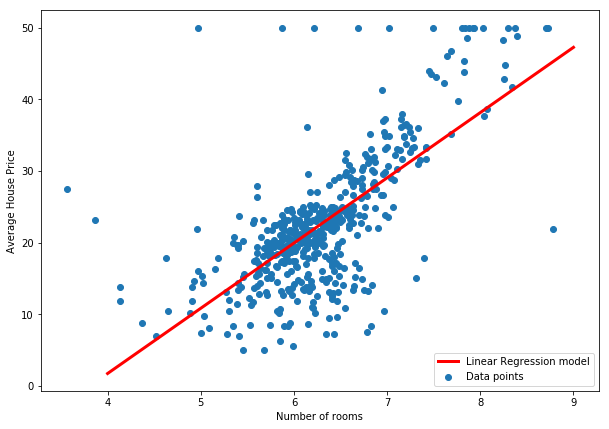

In [9]:
# create a figure to plot on (only necessary so we can define the size of it)
plt.figure(figsize=(10,7))

# a scatterplot creates a point for every (x,y) coordinate
plt.scatter(X,Y, label="Data points")

# to visualize our line, we need some linearly spaced data
# we can use numpy to get those, with linspace
# we pass as parameters the start, stop, and number of points
linearly_spaced_data_X = np.linspace(4, 9, 20)

# find the predictions of our model, by applying the coefficients
# this is nothing more than Y = a*X + b
linearly_spaced_data_Y = a * linearly_spaced_data_X + b

# plot this line (we need to reshape the Y's to work with matplotlib)
plt.plot(linearly_spaced_data_X, linearly_spaced_data_Y.reshape((-1,)),
         color='red', lw=3, label="Linear Regression model")

# Some plotting parameters to make the plot look nicer
plt.xlabel("Number of rooms")
plt.ylabel("Average House Price")
plt.legend();

#### Model performance

We can see that the more rooms a house has, the higher its price (on average), which is to be expected. We can also see our model (the red line) and the data (blue dots), and it seems that our models does a pretty good job. How can we quantify that? We use R², a metric that tells us "what percentage of Y is explained by the model". We can do it by using the `score` method of the model on the data:

In [10]:
# some fancy printing, you can skip the specifics
print("The model explains {:.2f}% of the average price.".format(model.score(X,Y)*100))

The model explains 48.35% of the average price.


It seems our model did not perform so well after all. We can do a lot to improve it, using different algorithms or more variables. We will choose the second, also called Multiple Linear Regression

### Multiple Linear Regression

We can perform Linear Regression with as many variables as we like. A new model form would possibly look like this (if we named our variables X,Z,V etc - our parameters a,b,c,k, etc):

    Y = a*X + b*Z + c*V +  ... + k
    
Since the alphabet of any language is limited, we usually denote the variables with X1, X2, etc, and the coefficients with a1, a2, etc. The intercept (the **b** in our initial model) is usually denoted as a0 and appears first. Our model becomes, for k variables:

    Y = a0 + a1*X1 + a2*X2 + a3*X3 + ... ak*Xk
    
Let's see how that works in code:

In [11]:
# this time we will use all of our variable
X = data

In [12]:
# define a new model
model2 = LinearRegression()

# fit it with all the data
# did you notice we don't have to perform all those weird reshapes?
model2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Scoring

Each variable is a dimension so visualizing 13 dimensions is a little tough. We can however check R²!

In [13]:
print("The Multiple Linear Regression model explains {:.2f}% of the average price.".format(model2.score(X,Y)*100))

The Multiple Linear Regression model explains 74.06% of the average price.


Quite a big improvement! We can continue to refine our model adding more variables (as a new variable we could take the square of an old variable, and we get what is called a *Polynomial Regression*), but we leave that to the reader. We will continue with another algorithm in the next article.